# Análise do Felicitômetro e Análise dos Líderes



Adiante abordaremos e faremos uma análise da pesquisa de felicidade das equipes e suas avaliações dos respectivos líderes. Tentaremos ver como os dados estão distribuídos, se há relações entre o nível de felicidade e as características descritas nas avaliações dos líderes, além disso, veremos as melhores características de cada líder e as diferenças entre as unidades.


##Importando os dados

In [0]:
import pandas as pd

In [0]:
data = pd.read_csv('dados_desafio.csv',sep=';', decimal=",", encoding='latin-1')


## Visualização geral dos dados

In [0]:
data.head(2)

In [0]:
data.describe(percentiles=[])

,LÍDER,Índice de felicidade da equipe,Orienta com relação ao trabalho,Deixa claro suas expectativas,Disponibiliza as informações necessárias para realizar o trabalho,Mantém equipe informada sobre assuntos da empresa,É receptivo a críticas,Dá abertura para a equipe,Envolve equipe nas decisões,Tem disponibilidade para atender a equipe,Orienta quanto ao desenvolvimento profissional,Dá feedbacks assertivos,Estimula o autodesenvolvimento,Respeita os valores da empresa,Respeita a equipe,Reconhece as pessoas
count,129.000000,126.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,24.852713,3.181667,3.294614,3.281421,3.288864,3.162353,3.542077,3.498850,3.238574,3.447739,3.117041,3.070341,3.161331,3.652477,3.689305,3.277507
std,19.030445,0.389701,0.384829,0.377028,0.389579,0.392036,0.329058,0.386515,0.397725,0.394892,0.485984,0.482470,0.459880,0.345275,0.270285,0.419455
min,1.000000,2.000000,1.500000,1.500000,2.000000,2.000000,2.000000,1.500000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.500000
50%,21.000000,3.190000,3.333333,3.272727,3.300000,3.166667,3.583333,3.555556,3.250000,3.500000,3.100000,3.000000,3.166667,3.684211,3.695652,3.285714
max,68.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000


Percebe-se que faltam 3 respostas no **Índice de felicidade da equipe**,  distribuídos em 1 na unidade **B** e 2 na unidade **C**.

###Importando Seaborn 

Biblioteca usada para os gráficos e análises


In [0]:
!pip install seaborn==0.9.0

In [0]:
import seaborn as sns

## Analisando os dados

Resolvi começar a análise tentando ver os melhores líderes e o que eles tem em comum. Então, criei uma coluna a mais com a média das avaliações de cada líder com excessão do parâmetro **Índice de felicidade da equipe**.

In [0]:
melhores_lideres_mean = data.drop(columns = ['Índice de felicidade da equipe', 'UNIDADE', 'LÍDER'])
col = melhores_lideres_mean.loc[: ,:]
melhores_lideres_mean['Média das avaliações por líder'] = col.mean(axis=1)
melhores_lideres_lista = melhores_lideres_mean
melhores_lideres_lista['Unidade']= data.iloc[:,0]
melhores_lideres_lista['LÍDER']= data.iloc[:,1]
melhores_lideres_lista = melhores_lideres_lista[['Unidade','LÍDER','Média das avaliações por líder']]
melhores_lideres_lista = melhores_lideres_lista.sort_values(by=['Média das avaliações por líder'], ascending=False)

A seguir temos os líderes com as melhores médias em ordem.

In [0]:
melhores_lideres_lista.head(5)

,Unidade,LÍDER,Média das avaliações por líder
51,C,4,4.000000
48,C,1,3.928571
64,D,4,3.857143
122,D,62,3.785714
108,D,48,3.785714


Podemos observar um líder com a média de 4 (nota máxima), ou seja, seu time avalia esse líder com excelente em todas as habilidades. Além disso, temos outros líderes com notas bem altas.


---



Agora, vamos analisar o quadro geral de líderes, e os comportamentos melhores avaliados em média.

In [0]:
data_analise = data.drop(columns = ['Índice de felicidade da equipe', 'UNIDADE', 'LÍDER'])


In [0]:
data_analise.loc['Média das avaliações'] = data_analise.mean()

In [0]:
data_analise_ordem = data_analise.sort_values(data_analise.last_valid_index(), axis=1)

In [0]:
data_analise_ordem = data_analise_ordem[data_analise_ordem.columns[::-1]]

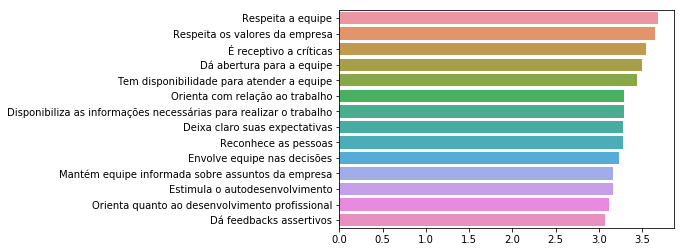

In [0]:
sns.barplot(y = data_analise_ordem.iloc[:-1,:].mean().index, x = data_analise_ordem.iloc[:-1,:].mean());

Com esse gráfico podemos observar que em média, as características mais bem avaliadas dos líderes são o **Respeito a equipe** e **Respeita os valores da empresa**.
Enquanto as menos bem avaliadas, em média, são **Dar feedbacks assertivos** e **Orientação quanto ao desenvolvimento profissional**.



---



###**Distribuição do Índice de felicidade por Unidade**

Vamos analisar a relação entre as unidades e os líderes.

Vamos ver a quantidade de líderes por unidade.

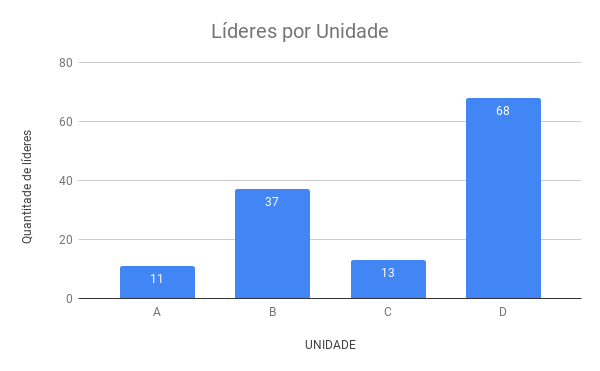

In [0]:
from IPython.display import Image
Image(filename="Líderes por Unidade.png")

Podemos ver que as unidades possuem números bem diferentes em quantidade de líderes.


---



Queremos analisar como estão distribuídos os níveis de felicidade por unidade. Então vamos gerar um gráfico separando por unidades e avaliando a distribuição dos índices de felicidade da equipe.



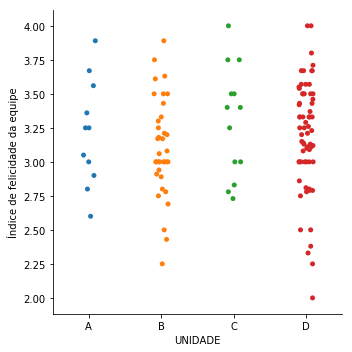

In [0]:
sns.catplot(x = 'UNIDADE', y = 'Índice de felicidade da equipe',data=data);

Percebemos que há uma grande dispersão da felicidade em cada unidade.
Obs: Aqui podemos observar um outlier com relação a um líder na unidade D,  com o **felicitômetro de 2**. 


Vamos analisar a média de felicidade por unidade e seu desvio padrão para comprovarmos a dispersão em volta da média.


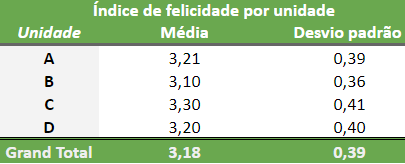

In [0]:
Image(filename="ìndice de felicidade por unidade.png")

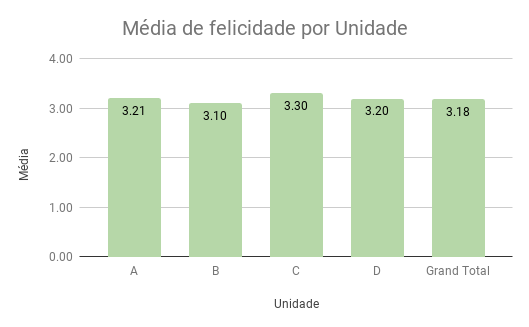

In [0]:
from IPython.display import Image
Image(filename="Média de felicidade por Unidade (1).png")

Também podemos observar que em média a Unidade **mais feliz** é a unidade **C** e a menos feliz é a unidade **B**. Porém, também se percebe que o desvio padrão da unidade **C** é o maior, o que mostra que existe uma discrepância dentro da Unidade em relação à **Felicidade**.



---



###Caractrísticas separadas por unidade




Primeiramente, vamos fazer um gráfico de cada unidade para visualizarmos os comportamentos dos líderes separadamente.

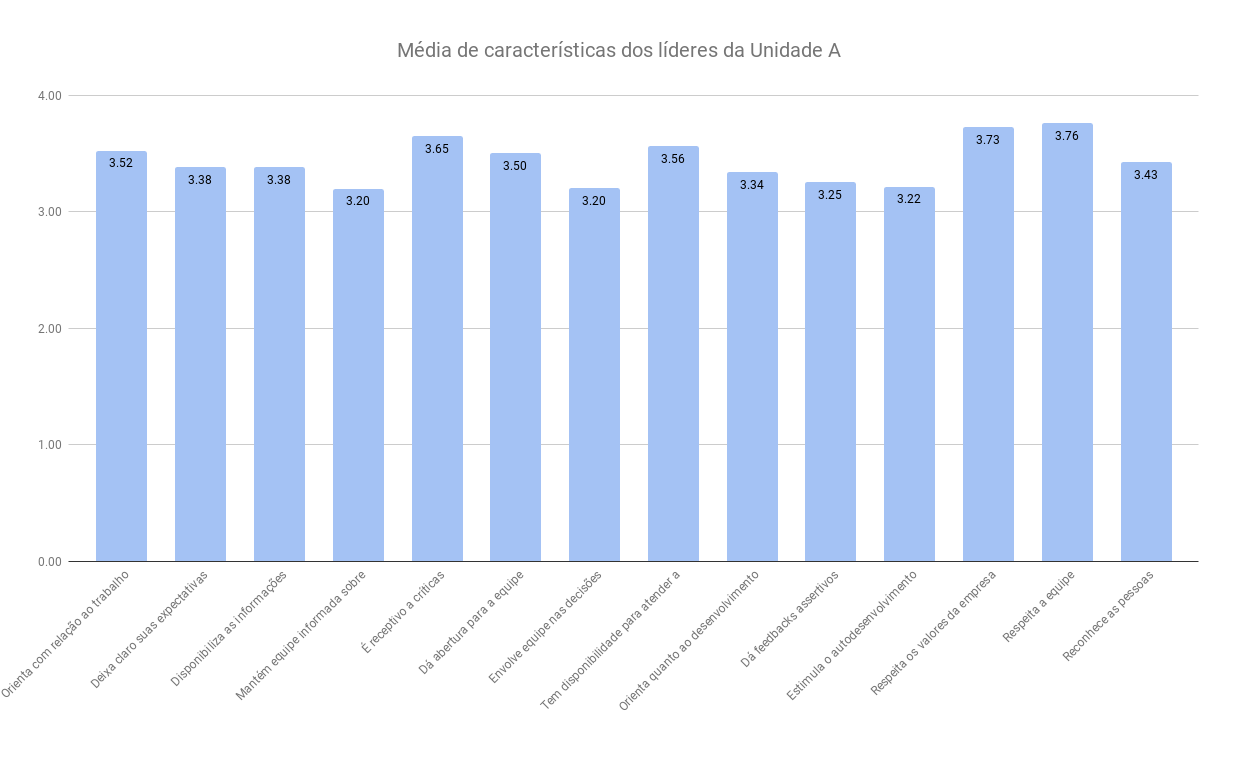

In [0]:
from IPython.display import Image
Image(filename="Média de características dos líderes da Unidade A.png")

*   Piores avaliados: Mantém equipe informada sobre assuntos da empresa e Envolve equipe nas decisões
*   Melhor avaliado: Respeita a equipe





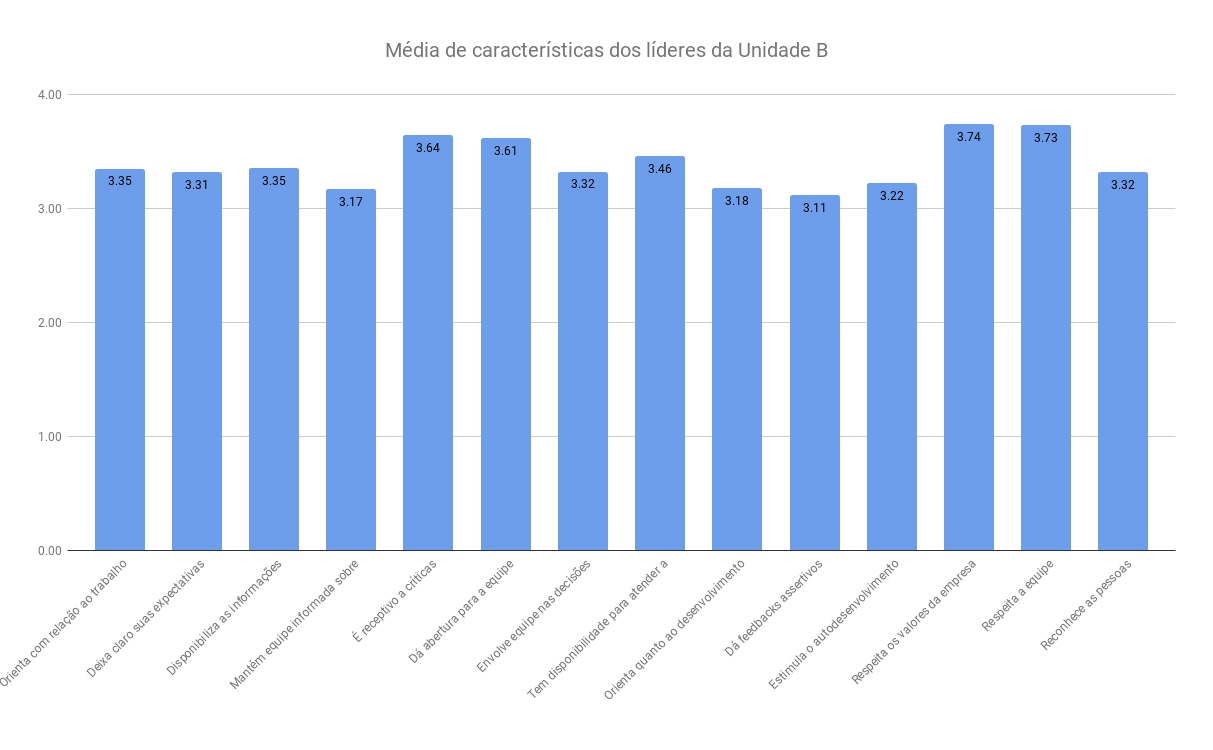

In [0]:

Image(filename="Média de características dos líderes da Unidade B.png")


*   Melhores avaliados: Respeita os valores da empresa e Respeita a equipe
*   Pior avaliado: Dá feedbacks assertivos

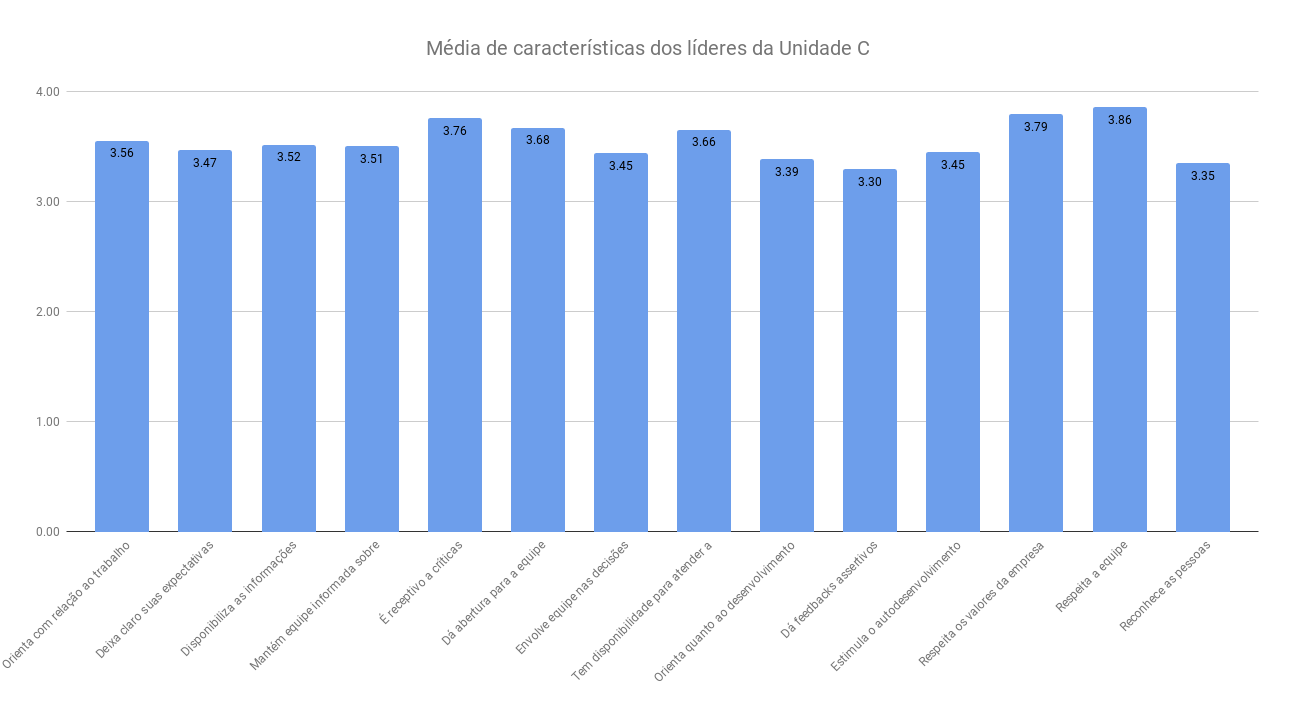

In [0]:

Image(filename="Média de características dos líderes da Unidade C.png")

*   Melhor avaliado: Respeita a equipe
*   Pior avaliado: Dá feedbacks assertivos

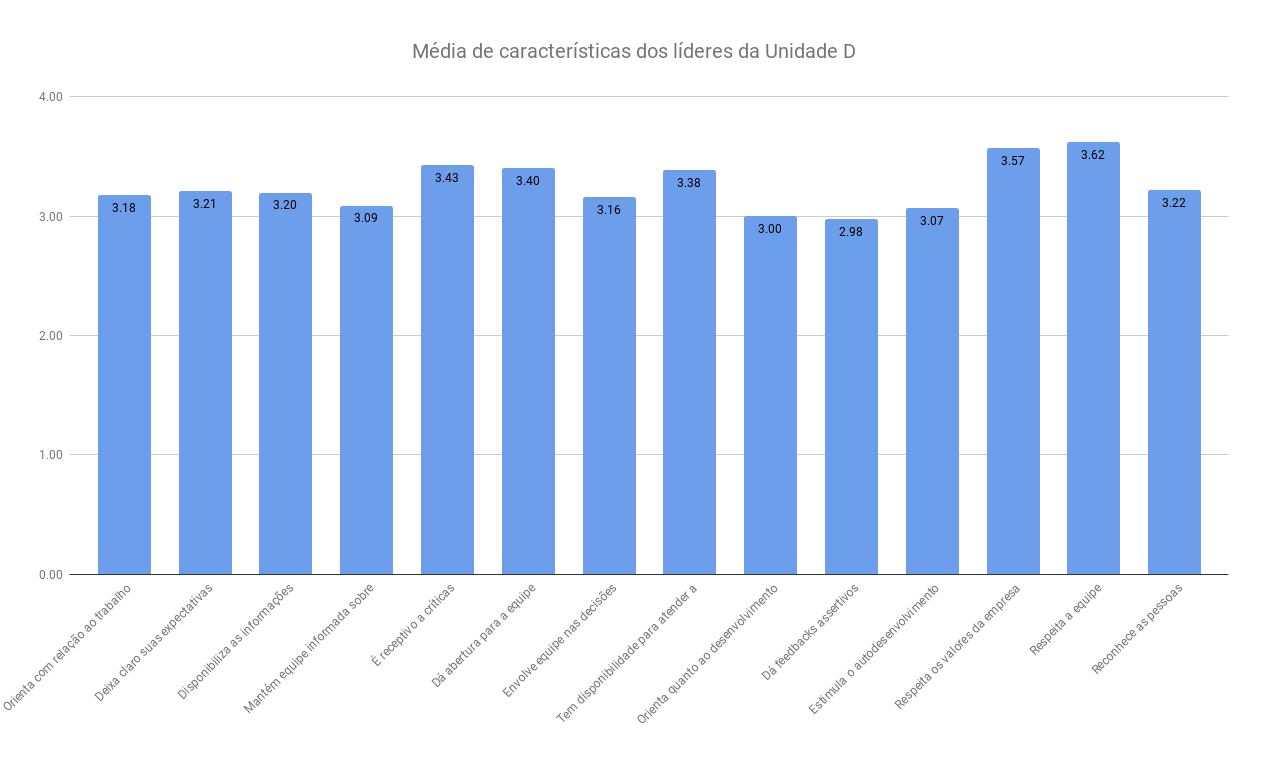

In [0]:

Image(filename="Média de características dos líderes da Unidade D.png")

*   Melhor avaliado: Respeita a equipe
*   Piores avaliados : Dá feedbacks assertivos e Orienta quanto ao desenvolvimento profissional

###Nível de correlação das avaliações dos líderes com o Felicitômetro

Adiante tentarei achar uma correlação entre as características dos líderes com a felicidade de sua equipe.

In [0]:
data_correlacao = data.drop(columns = ['UNIDADE', 'LÍDER'])

In [0]:
data_correlacao = data_correlacao.fillna(data_correlacao.mean())

In [0]:
import matplotlib.pyplot as plt

In [0]:
data_correlacao['Média'] = data_analise.mean(axis=1)

In [0]:
data_correlacao.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis =1)

,Índice de felicidade da equipe,Orienta com relação ao trabalho,Deixa claro suas expectativas,Disponibiliza as informações necessárias para realizar o trabalho,Mantém equipe informada sobre assuntos da empresa,É receptivo a críticas,Dá abertura para a equipe,Envolve equipe nas decisões,Tem disponibilidade para atender a equipe,Orienta quanto ao desenvolvimento profissional,Dá feedbacks assertivos,Estimula o autodesenvolvimento,Respeita os valores da empresa,Respeita a equipe,Reconhece as pessoas,Média
Índice de felicidade da equipe,1.0,0.045,0.06,0.095,0.2,0.081,0.072,0.015,0.13,0.1,0.041,0.11,0.059,-0.011,0.045,0.098
Orienta com relação ao trabalho,0.045,1.0,0.57,0.69,0.46,0.53,0.45,0.47,0.56,0.55,0.64,0.54,0.56,0.48,0.49,0.74
Deixa claro suas expectativas,0.06,0.57,1.0,0.55,0.49,0.45,0.39,0.47,0.49,0.57,0.59,0.53,0.52,0.41,0.48,0.7
Disponibiliza as informações necessárias para realizar o trabalho,0.095,0.69,0.55,1.0,0.48,0.5,0.5,0.5,0.58,0.46,0.6,0.6,0.55,0.48,0.44,0.73
Mantém equipe informada sobre assuntos da empresa,0.2,0.46,0.49,0.48,1.0,0.43,0.36,0.6,0.47,0.44,0.5,0.49,0.45,0.42,0.42,0.65
É receptivo a críticas,0.081,0.53,0.45,0.5,0.43,1.0,0.72,0.39,0.58,0.46,0.61,0.58,0.7,0.66,0.4,0.73
Dá abertura para a equipe,0.072,0.45,0.39,0.5,0.36,0.72,1.0,0.53,0.51,0.47,0.61,0.59,0.68,0.68,0.46,0.74
Envolve equipe nas decisões,0.015,0.47,0.47,0.5,0.6,0.39,0.53,1.0,0.59,0.43,0.54,0.55,0.52,0.53,0.54,0.72
Tem disponibilidade para atender a equipe,0.13,0.56,0.49,0.58,0.47,0.58,0.51,0.59,1.0,0.51,0.63,0.62,0.61,0.56,0.54,0.79
Orienta quanto ao desenvolvimento profissional,0.1,0.55,0.57,0.46,0.44,0.46,0.47,0.43,0.51,1.0,0.58,0.66,0.59,0.43,0.52,0.72


Podemos ver que a tabela de correlação aplicando a fórmula de Spearman, que é mais robusta e lida com relações não-lineares, que as **Avaliações dos Líderes**  está pouco correlacionada com a **Felicidade da Equipe**.  No tópico abaixo tentarei aplicar um modelo de predição para tentar achar uma Avaliação que se destaca das demais. 

---

####Aplicação de um modelo de predição para análise de importância das Avaliações dos Líderes

Tentarei aplicar um modelo de predição e analisar o quanto as Avaliações dos Líderes são importantes pro modelo.

In [0]:
from sklearn.ensemble import RandomForestRegressor

Separei os dados e a minha predição será o **Índice de felicidade da equipe**, ou seja o **Y**, usando as informações  das **Avaliações dos Líderes** como o **X **.

In [0]:
X = data_analise.iloc[:-1,:]
y = data_correlacao['Índice de felicidade da equipe']

In [0]:
X.describe()


Escolhi o modelo de **Regressão do Random Forest**, pois é um algoritmo mais flexível e de fácil uso, normalmente com excelentes resultados.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=777)


In [0]:
regr = RandomForestRegressor(max_depth=2, random_state=777,n_estimators=100)

In [0]:
regr.fit(X_train, y_train) 

In [0]:
importance = regr.feature_importances_

In [0]:
Ranking_de_importância = pd.DataFrame(importance, columns = ['Importância'])


In [0]:
Avaliacao_dos_lideres = data_analise.columns.values.tolist()

Após o modelo treinado, vamos ao que interessa, analisar se alguma Avaliação se destaca, usando **feature_importances_** 

In [0]:
Ranking_de_importância['Avaliação dos Líderes'] = ['Orienta com relação ao trabalho',
 'Deixa claro suas expectativas',
 'Disponibiliza as informações necessárias para realizar o trabalho',
 'Mantém equipe informada sobre assuntos da empresa',
 'É receptivo a críticas',
 'Dá abertura para a equipe',
 'Envolve equipe nas decisões',
 'Tem disponibilidade para atender a equipe',
 'Orienta quanto ao desenvolvimento profissional',
 'Dá feedbacks assertivos',
 'Estimula o autodesenvolvimento',
 'Respeita os valores da empresa',
 'Respeita a equipe',
 'Reconhece as pessoas']


In [0]:
Ranking_de_importância = Ranking_de_importância.sort_values(by=['Importância'], ascending=False)
Ranking_de_importância.head(13)

,Importância,Avaliação dos Líderes
3,0.176486,Mantém equipe informada sobre assuntos da empresa
13,0.141463,Reconhece as pessoas
8,0.116691,Orienta quanto ao desenvolvimento profissional
6,0.076513,Envolve equipe nas decisões
10,0.070862,Estimula o autodesenvolvimento
1,0.068572,Deixa claro suas expectativas
0,0.067069,Orienta com relação ao trabalho
11,0.066696,Respeita os valores da empresa
9,0.053094,Dá feedbacks assertivos
5,0.044540,Dá abertura para a equipe


Podemos analisar que as caractrísticas que possuem maior importância, nesse modelo com as determinadas propriedades foram **"Mantém equipe informada sobre assuntos da empresa"** e **"Reconhece as pessoas"**.



---



##Conclusões sobre os dados

Os comportamentos dos líderes melhores avaliados da Softplan em geral foram os **respeitos a equipe e aos valores da empresa.** E os piores avaliados foram **dar feedbacks assertivos e orientação quanto ao desenvolvimento profissional. **

Também podemos analisar que a felicidade dentro da unidade está bem dispersa e não há um padrão tão definido.
Além disso, podemos visualizar que as unidades tem unanimidade em relação ao ponto forte do comportamento do líder, que é o **respeito a equipe**. 

##Considerações



Há algumas considerações a serem feitas sobre a abordagem:.


1 - Se tivéssemos mais informações sobre as unidades e seus membros em específico, como por exemplo: sexo, idade, tempo na empresa, etc. poderíamos relacionar isso com as avaliações dos líderes e termos uma análise com maiores correlações e também com mais insights em relação a felicidade do grupo.

2- O dia do mês que a pesquisa foi feita também pode influenciar bastante as avaliações de felicidade, deveríamos fazer um teste A-B para que pudéssemos comparar esse ponto e ver se houve mudança da felicidade da equipe.

Sugestões para as próximas avaliações dos líderes:
- Aumentar o tamanho das respostas, talvez com uma escala de 0 a 10, poderíamos ter uma análise com maior diferença e talvez uma maior correlação;
- Pegar as avaliações individuais dos colaboradores e não trabalhar apenas com a média de cada líder;


Perguntas:
- Demonstra ser alguém confiável para contar uma dificuldade
- Possui empatia
- Possui hábilidade de comunicação